# Working with `pandas` Data Frames (Heterogeneous Data)
| Name       | Student Number | Email Address            | Student Type         |
|------------|----------------|--------------------------|----------------------|
| YUPENG WEN | s224212855     | s224212855@deakin.edu.au | Postgraduate(Sit731) |

## Introduction
In this report, we will explore how to work with pandas for handling DataFrames. We will cover tasks such as loading data from files, converting columns, computing aggregates, and creating plots. This guide demonstrates the typical workflow for cleaning and analyzing data, helping readers understand the standard process of data preparation and visualization.

## Instruction

### Download File and Load Data
In this section, we will download the data file `nycflights13_weather.csv.gz` from the unit site (Learning Resources/Data folder) and then load it using `pandas`.

In [1]:
# Import libraries
import pandas as pd

# Preview the data
df = pd.read_csv("data/BTC-USD-2023/nycflights13_weather.csv.gz", compression='gzip', comment="#")
df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


### Convert Columns
In this section, we will convert all columns to use metric or derived units.
1. `temp` and `dewp` to Celsius;
2. `precip` to millimetres;
3. `visib` to metres;
4. `wind_speed` and `wind_gust` to metres per second.

#### Temperature & Dew Point: from Fahrenheit to Celsius
Formula [1]:
$$
C = (F - 32) \times \frac{5}{9}
$$

In [2]:
df["temp"] = (df["temp"] - 32) * 5 / 9
df["dewp"] = (df["dewp"] - 32) * 5 / 9

#### Precipitation: inches -> millimetres
Formula [2]:
$$
mm = inch \times 25.4
$$

In [3]:
df["precip"] = df["precip"] * 25.4

#### Visibility: miles to metres
Formula [3]:
$$
m = miles \times 1609.34
$$

In [4]:
df['visib'] = df['visib'] * 1609.34

#### Wind speed and gust: mph to m/s
Formula [4]:
$$
m/s = mph \times 0.44704
$$

In [5]:
df['wind_speed'] = df['wind_speed'] * 0.44704
df['wind_gust'] = df['wind_gust'] * 0.44704

In [6]:
# Show the data
df[['temp', 'dewp', 'precip', 'visib', 'wind_speed', 'wind_gust']].head()

,temp,dewp,precip,visib,wind_speed,wind_gust
0,2.8,-5.6,0.0,16093.4,4.630002,5.328114
1,2.8,-5.6,0.0,16093.4,6.173336,7.104152
2,3.3,-5.6,0.0,16093.4,5.658892,6.512139
3,3.3,-5.0,0.0,16093.4,6.173336,7.104152
4,3.3,-4.4,0.0,16093.4,6.687781,7.696165


### Compute Columns
In this section, we demonstrate the calculation of daily mean wind speeds for LGA airport, illustrating how to create and compute new columns in the dataset.

In [7]:
# Filter data for LGA airport
lga_df = df[df['origin'] == 'LGA']

# Group by year, month, day and compute mean wind_speed
daily_wind_lga = lga_df.groupby(['year', 'month', 'day'])['wind_speed'].mean().reset_index()

# rename column for clarity
daily_wind_lga.rename(columns={'wind_speed': 'mean_wind_speed'}, inplace=True)

# Check the first few rows
daily_wind_lga.head()

,year,month,day,mean_wind_speed
0,2013,1,1,6.687781
1,2013,1,2,6.430559
2,2013,1,3,4.908660
3,2013,1,4,6.880698
4,2013,1,5,5.144447


### Present Data
In this section, we demonstrate how to use `matplotlib` to visualize the daily mean wind speeds at LGA, presenting the data in a single comprehensive plot.

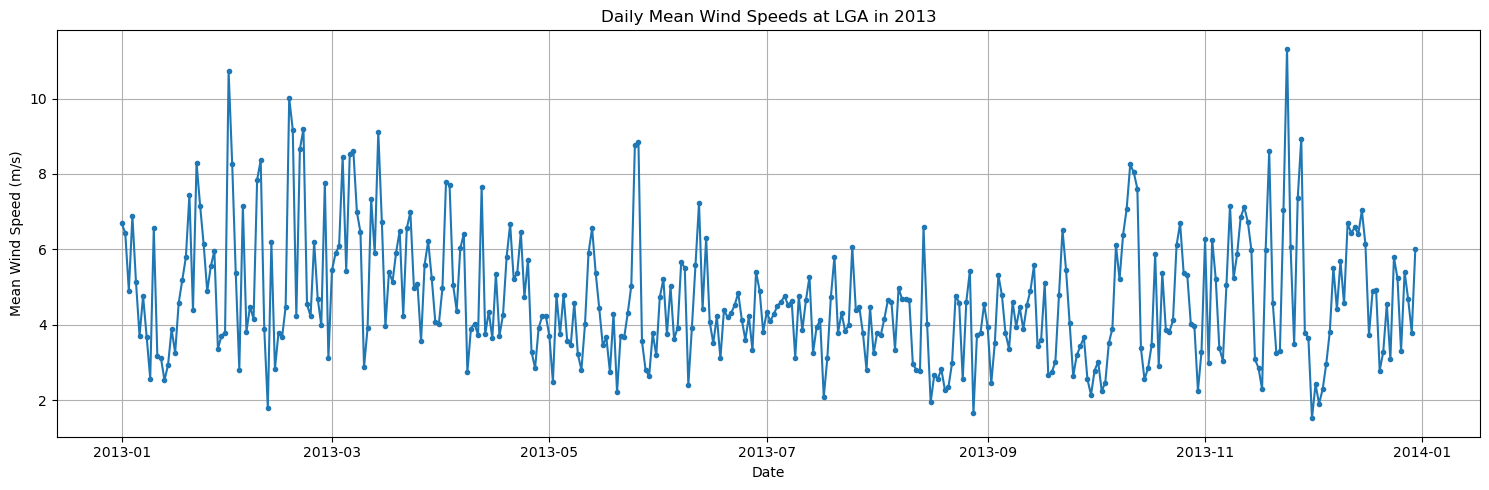

In [8]:
# Import plotting libraries
import matplotlib.pyplot as plt

# Create a proper datetime column for daily aggregation
daily_wind_lga['date'] = pd.to_datetime(daily_wind_lga[['year', 'month', 'day']])

# Plot daily mean wind speeds
plt.figure(figsize=(15, 5))
plt.plot(daily_wind_lga['date'], daily_wind_lga['mean_wind_speed'], marker='o', linestyle='-', markersize=3)
plt.title("Daily Mean Wind Speeds at LGA in 2013")
plt.xlabel("Date")
plt.ylabel("Mean Wind Speed (m/s)")
plt.grid(True)

# Improve x-axis readability: show month names
odd_months = pd.date_range(start='2013-01-01', end='2014-01-31', freq='2MS')
plt.xticks(odd_months, [d.strftime('%Y-%m') for d in odd_months])

plt.tight_layout()
plt.show()


### Identify Large Data
In this part, we demonstrate methods for detecting and handling large data in the dataset.

In [9]:
# Sort daily mean wind speeds in descending order
top10_windiest = daily_wind_lga.sort_values(by='mean_wind_speed', ascending=False).head(10)

# Display the results (dates and mean wind speeds)
top10_windiest[['date', 'mean_wind_speed']]

,date,mean_wind_speed
327,2013-11-24,11.317783
30,2013-01-31,10.717598
47,2013-02-17,10.010236
51,2013-02-21,9.192903
48,2013-02-18,9.174264
72,2013-03-14,9.109958
331,2013-11-28,8.938477
145,2013-05-26,8.852736
144,2013-05-25,8.766995
50,2013-02-20,8.659819


We can also use `max()` to identify the outlier data.

In [10]:
max_wind_speed = df['wind_speed'].max()
outlier_row = df[df['wind_speed'] == max_wind_speed]
outlier_row

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
1015,EWR,2013,2,12,8,3.9,-2.8,61.63,260.0,468.659114,539.323535,0.0,1008.3,16093.4,2013-02-12 09:00:00


### Clean data
In this part, we will compute the monthly mean wind speeds for all three airports. Along the way, any outliers will be replaced with `np.nan`.

In [11]:
# Import numpy for NaN
import numpy as np

# Replace the outlier with NaN
df.loc[df['wind_speed'] == max_wind_speed, 'wind_speed'] = np.nan


In [12]:
# Compute monthly mean wind speeds for all airports
monthly_mean_wind = df.groupby(['origin', 'year', 'month'])['wind_speed'].mean().reset_index()

# rename the column for clarity
monthly_mean_wind.rename(columns={'wind_speed': 'mean_wind_speed'}, inplace=True)

# Show the first few rows
for airport in monthly_mean_wind['origin'].unique():
    print(f"   {airport}   ")
    display(monthly_mean_wind[monthly_mean_wind['origin'] == airport].head())


   EWR   


,origin,year,month,mean_wind_speed
0,EWR,2013,1,4.328121
1,EWR,2013,2,4.731659
2,EWR,2013,3,5.144447
3,EWR,2013,4,4.265604
4,EWR,2013,5,3.709672


   JFK   


,origin,year,month,mean_wind_speed
12,JFK,2013,1,5.378474
13,JFK,2013,2,5.954831
14,JFK,2013,3,6.209389
15,JFK,2013,4,5.584480
16,JFK,2013,5,4.600270


   LGA   


,origin,year,month,mean_wind_speed
24,LGA,2013,1,5.068977
25,LGA,2013,2,5.522218
26,LGA,2013,3,5.848862
27,LGA,2013,4,4.931524
28,LGA,2013,5,4.197841


### Draw Figure
In this part, we will draw the monthly mean wind speeds for the three airports on the same plot with the help of `matplotlib`.

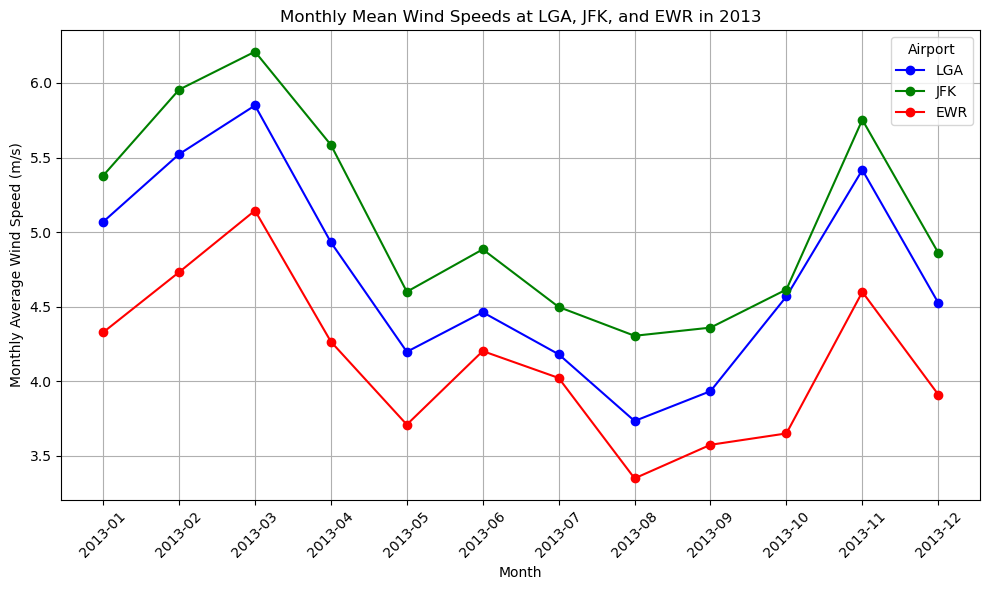

In [13]:
# Import matplotlib
import matplotlib.pyplot as plt

# Prepare the plot
plt.figure(figsize=(10, 6))

# List of airports and colors
airports = ['LGA', 'JFK', 'EWR']
colors = ['blue', 'green', 'red']

# Plot monthly mean wind speeds for each airport
for airport, color in zip(airports, colors):
    airport_data = monthly_mean_wind[monthly_mean_wind['origin'] == airport]
    # Create a string for x-axis: YYYY-MM
    x_labels = airport_data['year'].astype(str) + '-' + airport_data['month'].astype(str).str.zfill(2)
    plt.plot(x_labels, airport_data['mean_wind_speed'], marker='o', color=color, label=airport)

# Plot formatting
plt.title("Monthly Mean Wind Speeds at LGA, JFK, and EWR in 2013")
plt.xlabel("Month")
plt.ylabel("Monthly Average Wind Speed (m/s)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Airport")
plt.tight_layout()
plt.show()


### Optional Features: Data Frame Rebuild
In this section, we will learn how to rebuild DataFrames, merge multiple DataFrames, and filter and clean the data.

In [14]:
# Filter data for JFK
jfk_df = df[df['origin'] == 'JFK'].copy()
print(jfk_df['time_hour'].head(10)) # we can see that 2013-01-01 06:00:00 is missed

8708    2013-01-01 01:00:00
8709    2013-01-01 02:00:00
8710    2013-01-01 03:00:00
8711    2013-01-01 04:00:00
8712    2013-01-01 05:00:00
8713    2013-01-01 07:00:00
8714    2013-01-01 08:00:00
8715    2013-01-01 09:00:00
8716    2013-01-01 10:00:00
8717    2013-01-01 11:00:00
Name: time_hour, dtype: object


In [15]:
# Create a continuous hourly datetime range for 2013
full_hours = pd.date_range(start='2013-01-01 00:00:00', end='2013-12-31 23:00:00', freq='h').to_series().rename(
    'time_hour')

jfk_df['time_hour'] = pd.to_datetime(jfk_df['time_hour'])
jfk_df = jfk_df.sort_values('time_hour')

jfk_df_full = full_hours.to_frame().merge(jfk_df, on='time_hour', how='left')

jfk_df_full['origin'] = 'JFK'
jfk_df_full['year'] = jfk_df_full['time_hour'].dt.year
jfk_df_full['month'] = jfk_df_full['time_hour'].dt.month
jfk_df_full['day'] = jfk_df_full['time_hour'].dt.day
jfk_df_full['hour'] = jfk_df_full['time_hour'].dt.hour
print(jfk_df_full[['time_hour','year','month','day']].head(10)) # we can see that the missed data 2013-01-01 06:00:00 has been supplemented

            time_hour  year  month  day
0 2013-01-01 00:00:00  2013      1    1
1 2013-01-01 01:00:00  2013      1    1
2 2013-01-01 02:00:00  2013      1    1
3 2013-01-01 03:00:00  2013      1    1
4 2013-01-01 04:00:00  2013      1    1
5 2013-01-01 05:00:00  2013      1    1
6 2013-01-01 06:00:00  2013      1    1
7 2013-01-01 07:00:00  2013      1    1
8 2013-01-01 08:00:00  2013      1    1
9 2013-01-01 09:00:00  2013      1    1


In [16]:
# Select only the missing temperature readings
missing_temps = jfk_df_full[jfk_df_full['temp'].isna()]
print(missing_temps.head())

               time_hour origin  year  month  day  hour  temp  dewp  humid  \
0    2013-01-01 00:00:00    JFK  2013      1    1     0   NaN   NaN    NaN   
6    2013-01-01 06:00:00    JFK  2013      1    1     6   NaN   NaN    NaN   
1230 2013-02-21 06:00:00    JFK  2013      2   21     6   NaN   NaN    NaN   
1519 2013-03-05 07:00:00    JFK  2013      3    5     7   NaN   NaN    NaN   
2138 2013-03-31 02:00:00    JFK  2013      3   31     2   NaN   NaN    NaN   

      wind_dir  wind_speed  wind_gust  precip  pressure  visib  
0          NaN         NaN        NaN     NaN       NaN    NaN  
6          NaN         NaN        NaN     NaN       NaN    NaN  
1230       NaN         NaN        NaN     NaN       NaN    NaN  
1519       NaN         NaN        NaN     NaN       NaN    NaN  
2138       NaN         NaN        NaN     NaN       NaN    NaN  


In [17]:
# Keep relevant columns (year, month, day, hour, temp)
missing_temps = missing_temps[['time_hour', 'year', 'month', 'day', 'hour', 'temp']]

# Display the missing temperatures
missing_temps

,time_hour,year,month,day,hour,temp
0,2013-01-01 00:00:00,2013,1,1,0,NaN
6,2013-01-01 06:00:00,2013,1,1,6,NaN
1230,2013-02-21 06:00:00,2013,2,21,6,NaN
1519,2013-03-05 07:00:00,2013,3,5,7,NaN
2138,2013-03-31 02:00:00,2013,3,31,2,NaN
2209,2013-04-03 01:00:00,2013,4,3,1,NaN
5381,2013-08-13 05:00:00,2013,8,13,5,NaN
5453,2013-08-16 05:00:00,2013,8,16,5,NaN
5542,2013-08-19 22:00:00,2013,8,19,22,NaN
5615,2013-08-22 23:00:00,2013,8,22,23,NaN


### Complete the Data
In this part, we will complete the missing data by linearly interpolating between the preceding and following non-missing data.

In [18]:
temp = pd.DataFrame({
    'time_hour': jfk_df_full['time_hour'],
    'temp_interp': jfk_df_full['temp'].interpolate(method='linear', limit_direction='both'),
    'temp': jfk_df_full['temp']
})
temp.head(10)

,time_hour,temp_interp,temp
0,2013-01-01 00:00:00,3.3,NaN
1,2013-01-01 01:00:00,3.3,3.3
2,2013-01-01 02:00:00,3.3,3.3
3,2013-01-01 03:00:00,3.9,3.9
4,2013-01-01 04:00:00,3.9,3.9
5,2013-01-01 05:00:00,3.9,3.9
6,2013-01-01 06:00:00,3.9,NaN
7,2013-01-01 07:00:00,3.9,3.9
8,2013-01-01 08:00:00,3.9,3.9
9,2013-01-01 09:00:00,4.4,4.4


In [19]:
jfk_df_full['temp_interp'] = jfk_df_full['temp'].interpolate(method='linear', limit_direction='both')
jfk_df_full['dewp_interp'] = jfk_df_full['dewp'].interpolate(method='linear', limit_direction='both')
jfk_df_full['humid_interp'] = jfk_df_full['humid'].interpolate(method='linear', limit_direction='both')
jfk_df_full['wind_dir_interp'] = jfk_df_full['wind_dir'].interpolate(method='linear', limit_direction='both')
jfk_df_full['wind_speed_interp'] = jfk_df_full['wind_speed'].interpolate(method='linear', limit_direction='both')
jfk_df_full['wind_gust_interp'] = jfk_df_full['wind_gust'].interpolate(method='linear', limit_direction='both')
jfk_df_full['precip_interp'] = jfk_df_full['precip'].interpolate(method='linear', limit_direction='both')
jfk_df_full['pressure_interp'] = jfk_df_full['pressure'].interpolate(method='linear', limit_direction='both')
jfk_df_full['visib_interp'] = jfk_df_full['visib'].interpolate(method='linear', limit_direction='both')

print(jfk_df_full.head(10))

            time_hour origin  year  month  day  hour  temp  dewp  humid  \
0 2013-01-01 00:00:00    JFK  2013      1    1     0   NaN   NaN    NaN   
1 2013-01-01 01:00:00    JFK  2013      1    1     1   3.3  -5.0  54.51   
2 2013-01-01 02:00:00    JFK  2013      1    1     2   3.3  -4.4  57.04   
3 2013-01-01 03:00:00    JFK  2013      1    1     3   3.9  -3.9  56.77   
4 2013-01-01 04:00:00    JFK  2013      1    1     4   3.9  -3.3  59.37   
5 2013-01-01 05:00:00    JFK  2013      1    1     5   3.9  -3.9  56.77   
6 2013-01-01 06:00:00    JFK  2013      1    1     6   NaN   NaN    NaN   
7 2013-01-01 07:00:00    JFK  2013      1    1     7   3.9  -3.3  59.37   
8 2013-01-01 08:00:00    JFK  2013      1    1     8   3.9  -3.3  59.37   
9 2013-01-01 09:00:00    JFK  2013      1    1     9   4.4  -2.8  59.50   

   wind_dir  ...    visib  temp_interp  dewp_interp  humid_interp  \
0       NaN  ...      NaN          3.3         -5.0         54.51   
1     240.0  ...  16093.4          3

### Draw a plot
In this part, we will create a plot of average daily temperatures, comparing the cases where missing values are omitted versus where they are linearly interpolated.


In [20]:
# Daily avg with missing values omitted
daily_avg_omit = jfk_df_full.groupby(['year','month','day'])['temp'].mean()
daily_avg_interp = jfk_df_full.groupby(['year','month','day'])['temp_interp'].mean()

daily_avg_omit.index = pd.to_datetime(daily_avg_omit.index.to_frame())
daily_avg_interp.index = pd.to_datetime(daily_avg_interp.index.to_frame())

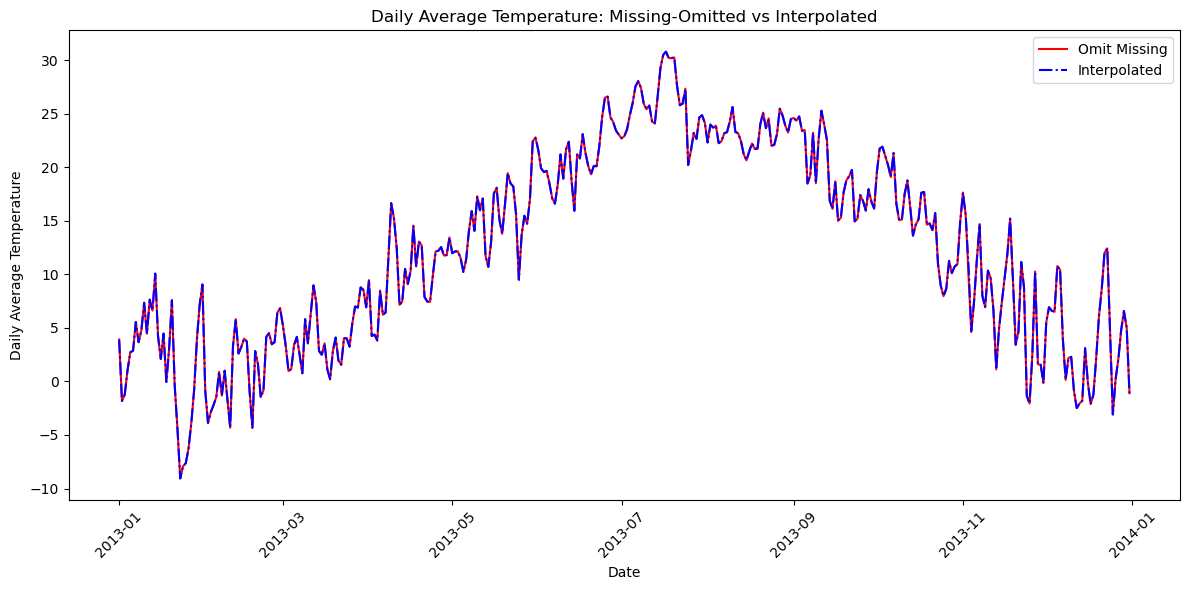

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_omit.index, daily_avg_omit.values,color='red', linestyle='-', label='Omit Missing')
plt.plot(daily_avg_interp.index, daily_avg_interp.values,color='blue',linestyle='-.', label='Interpolated')
plt.xlabel('Date')
plt.ylabel('Daily Average Temperature')
plt.title('Daily Average Temperature: Missing-Omitted vs Interpolated')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion
This report demonstrates the use of pandas for data handling, including cleaning, filtering, computing aggregates, handling missing values, and visualizing results. It illustrates a typical workflow for transforming raw data into meaningful insights and supporting effective analysis.

## Reference
[1] [Fahrenheit](https://en.wikipedia.org/wiki/Fahrenheit)
[2] [Inch](https://en.wikipedia.org/wiki/Inch).
[3] [Mile](https://en.wikipedia.org/wiki/Mile)
[4] [Miles_per_hour](https://en.wikipedia.org/wiki/Miles_per_hour)